<a href="https://colab.research.google.com/github/HugoMagos0725/Analisis_de_datos/blob/main/Tarea_2_Inferencia_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FCFM-BUAP, 2023**

## Proyecto: Inferencia Estadistica
Nombre: Hugo Cuautle Magos

Matricula: 201847053

Materia: Análisis de datos

# Problema 1:

Los siguientes datos


In [1]:
import numpy as np


x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])

es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

#**Solución**

Veamos que la función stats.cosine, considera la función de densidad como: 
$$f(x)=C\frac{1}{2\pi}(1+\cos(\frac{x-B}{a}))$$
Esto se puede ver en https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html

Por lo que consideremos la función de esta forma, y estimemos los parametros, esto podemos regresarlo a la función planteada en el problema mediante el cambio de variable $B=ba$

Primero veamos que el dominio de la función es $$-\pi < (x-B)/a <\pi $$
    
de esta forma: $$B-a\pi < x < B+a\pi$$

Ahora veamos que $f(x)$ se trata de una función de densidad de probabilidad, así, se tiene que cumplir que 

$$\int_{B-a\pi}^{ B+a\pi}f(x)dx=1$$

Por lo que:

\begin{equation}
  \begin{split}
    1 & = \int_{B-a\pi}^{ B+a\pi}f(x)dx\\
    & = \int_{B-a\pi}^{B+a\pi}C\frac{1}{2\pi}(1+cos(\frac{x-B}{a}))dx \\
    & = Ca 
  \end{split}
\end{equation}

De esta forma $C= \frac{1}{a}$

Así, nos queda la función de probabilidad :

$$f(x)=\frac{1}{2a\pi}(1+\cos(\frac{x-B}{a}))$$

Calculemos su esperanza: 

\begin{equation}
  \begin{split}
    E[X] & = \int_{B-a\pi}^{ B+a\pi}xf(x)dx\\
    & = \int_{B-a\pi}^{B+a\pi}\frac{x}{2a\pi}(1+cos(\frac{x-B}{a}))dx \\
    & = B
  \end{split}
\end{equation}

Ahora calculemos su segundo momento y seguido de esto su varianza: 

\begin{equation}
  \begin{split}
    E[X^2] & = \int_{B-a\pi}^{ B+a\pi}x^2f(x)dx\\
    & = \int_{B-a\pi}^{B+a\pi}\frac{x^2}{2a\pi}(1+cos(\frac{x-B}{a}))dx \\
    & = \frac{(\pi^2-6)a^2+3B^2}{3}
  \end{split}
\end{equation}

\begin{equation}
  \begin{split}
    Var[X^2] & = E[X^2]-E[X]^2 \\
    & = \frac{(\pi^2-6)a^2+3B^2}{3} - B^2 \\
    & = \frac{(\pi^2-6)a^2}{3}
  \end{split}
\end{equation}

Estimando la media y la varianza con el promedio y la varianza insesgada, tenemos: 

\begin{cases}
  B = E[X]= \overline{X} \\
  \frac{(\pi^2-6)a^2}{3} = Var[X]=s^2
\end{cases}

así, podemos estimar los valores de a y B, como sigue: 


\begin{cases}
  B = \overline{X} \\
  a = \sqrt{\frac{3s^2}{\pi^2-6}}
\end{cases}

entonces: 

In [2]:
B = x.mean()
a =np.sqrt((3*x.var())/(np.pi*np.pi-6))

print('a=', a)
print('B=',B)

a= 1.4967780099710417
B= 2.1342042433999997


Por lo que tenemos que: 

$$a = 1.496778 \text{ y } B=2.1342$$

Comparemos la función de acumulación de una distribucion coseno (con los parametros encontrados a y B), con la acumulación de nuestros datos 

Veamos su parecido con la función normal. Tanto la función de densidad, como la función de acumulación: 

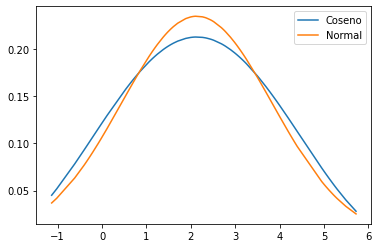

In [3]:
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

def fun(x,a,b):
  return (1/(2*np.pi*a))*(1+np.cos((x-b)/a))

plt.plot(np.sort(x),fun(np.sort(x),a,B))
plt.plot(np.sort(x),stats.norm(loc=x.mean(),scale=np.sqrt(x.var())).pdf(np.sort(x)))
plt.legend(['Coseno','Normal'])
plt.show()

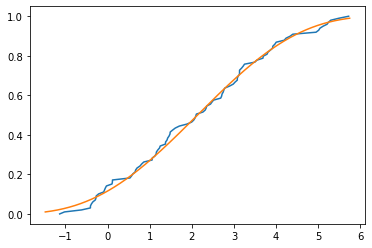

In [4]:
x_ord=np.sort(x)
acumulada= np.linspace(0,1,len(x))

x_1 = np.linspace(stats.cosine(B,a).ppf(0.01),
                  stats.cosine(B,a).ppf(0.99), 10000)
fda_cosine=stats.cosine.cdf(x_1, loc=B, scale=a)

plt.plot(x_ord,acumulada)
plt.plot(x_1,fda_cosine)
plt.show()

Vemos que las gráficas son muy parecidas.


Encontremos los intervalos de confianza, generando 100 arreglos aleatorios de una distribucion coseno, con parametros $a=1.496778$ y $B=2.1342$ de tamaño 100, tomando su media muestral y varianza insesgada de los 95 mas al centro, y con eso generar el intervalo de confianza de 95% de $a$ y $B$

In [5]:
import pandas as pd
med=np.zeros(100)
vari=np.zeros(100)
for i in range(0,100):  
  ran=stats.cosine.rvs(loc=B,scale=a,size=100)
  med[i]=ran.mean()
  vari[i]=ran.var()

med=np.sort(med)
vari=np.sort(vari)

def indices(x): 
  x=(x-x.mean())
  ind=[0,0,0,0,0]
  for i in range(5):
    a=max(abs(x))
    ind[i]=list(abs(x)).index(a)
    x[ind[i]]=0
  return ind

ind=indices(med)
med=np.delete(med,ind)

ind=indices(vari)
vari=np.delete(vari,ind)

Recordemos que $Var[x]=\frac{(\pi^2-6)a^2}{3}$, sea $Z$ nuestro arreglo de varianzas, entonces, el arreglo a usar para obtener el intervalo de confianza de a, sería: 

$$\sqrt{\frac{3*Z}{\pi^2-6}}$$


In [6]:
vari=np.sqrt(3*vari/(np.pi*np.pi-6))

In [7]:
print("Los valores estimados de a y B son: ", end='')
print(' a = ',a,' B= ',B)
text='\nIntervalo de confianza del 95% de '
print(text+'"a" es de: (',vari[0],vari[-1],')')
print(text+'"B" es de: (',med[0],med[-1],')')

Los valores estimados de a y B son:  a =  1.4967780099710417  B=  2.1342042433999997

Intervalo de confianza del 95% de "a" es de: ( 1.3216353515648727 1.6516245558969913 )

Intervalo de confianza del 95% de "B" es de: ( 1.8354668332327233 2.4715423710896918 )


# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%. 

# **Solución**

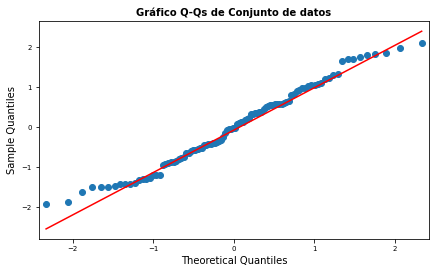

In [8]:
def grafico(a,b):
  fig, ax = plt.subplots(figsize=(7,4))
  sm.qqplot(np.array(a), fit   = True, line  = 'q', ax    = ax)
  ax.set_title('Gráfico Q-Qs de '+b, fontsize = 10,
             fontweight = "bold")
  ax.tick_params(labelsize = 7)

grafico(x,'Conjunto de datos')

Vemos mediante el gráfico Q-Q, que la distribución de nuestros datos es casí de tipo normal, ahora, hagamos una prueba de hipotesis para ver si estos pueden pertenecer a una distribución normal: 

Realicemos una prueba de 'D'Agostino's K-squared test'

In [9]:
from scipy.stats import shapiro 
est,p_value = shapiro(x)

print("Estadistico=%.3f, p_value=%.3f" % (est,p_value))

Estadistico=0.976, p_value=0.063


Como p_value es mayor a 0.05, podemos decir que los datos si pueden provenir de una distribución normal

In [10]:
media = x.mean()
print('La estimación del primer momento es: ', media)

La estimación del primer momento es:  2.1342042433999997


Sabemos que nuestros datos se distribuyen de una forma casi normal por la prueba de shapiro, y al tener una muestra grande $(n>30)$, podemos utilizar el teorema del limite central para obtener un intervalo de confianza para la media, y esta va a ser 

$$(\overline{X}-z_{\alpha/2}\frac{s}{\sqrt{n}},\overline{X}+z_{\alpha/
2}\frac{s}{\sqrt{n}})$$

Por lo que: 

In [11]:
z=stats.norm.ppf(1-0.025)

med_inf=x.mean()-z*np.sqrt(x.var()/len(x))
med_sup=x.mean()+z*np.sqrt(x.var()/len(x))

print("El intervalo de confianza de la media mu del 95% es:")
print('(',med_inf,med_sup,')\n')

El intervalo de confianza de la media mu del 95% es:
( 1.801024843303938 2.467383643496061 )



# Problema 3:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

#**Solución**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/calificaciones.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Grupo,Estudiante,Calificación
0,Grupo A,Estudiante 1,8.6
1,Grupo A,Estudiante 2,7.9
2,Grupo A,Estudiante 3,6.5
3,Grupo A,Estudiante 4,9.1
4,Grupo A,Estudiante 5,8.0
5,Grupo A,Estudiante 6,7.2
6,Grupo B,Estudiante 7,6.9
7,Grupo B,Estudiante 8,7.4
8,Grupo B,Estudiante 9,8.2
9,Grupo B,Estudiante 10,7.8


In [13]:
from scipy.stats import f_oneway

a=df[df['Grupo']=='Grupo A']['Calificación'].to_list()
b=df[df['Grupo']=='Grupo B']['Calificación'].to_list()
c=df[df['Grupo']=='Grupo C']['Calificación'].to_list()

est,p_val=f_oneway(a,b,c)

print('Estadistico de prueba:',est)
print('Valor p:', p_val)

Estadistico de prueba: 4.537127265640226
Valor p: 0.02877650747111931


Si consideramos una prueba de significancia de 0.05, vemos que el valor p es menor que este valor, así, rechazamos la hipotesis nula, es decir, las medias poblacionales no son iguales con un nivel de significancia de 0.05

# Problema 4:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótsis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

# **Solución a)**

In [14]:
df1=pd.read_csv('/content/drive/MyDrive/datos.csv')
df1

,Grupo,Datos
0,Grupo A,5.8
1,Grupo A,3.1
2,Grupo A,7.2
3,Grupo A,2.6
4,Grupo A,6.7
5,Grupo A,4.5
6,Grupo B,1.9
7,Grupo B,8.5
8,Grupo B,4.3
9,Grupo B,6.8


In [15]:
a=df1[df1['Grupo']=='Grupo A']['Datos'].to_list()
b=df1[df1['Grupo']=='Grupo B']['Datos'].to_list()

### Prueba grafica de normalidad

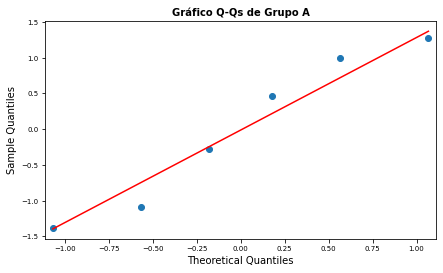

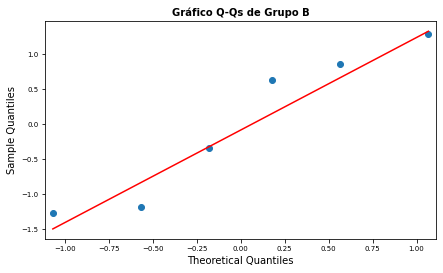

In [16]:
grafico(a,'Grupo A')
grafico(b,'Grupo B')

Prueba de hipotesis, para saber si provienen de una distribución normal

In [17]:
shapiro_test_a=stats.shapiro(a)
shapiro_test_b=stats.shapiro(b)

print('Valor p de prueba de Grupo A: ',shapiro_test_a[1])
print('Valor p de prueba de Grupo B: ',shapiro_test_b[1])

Valor p de prueba de Grupo A:  0.555199146270752
Valor p de prueba de Grupo B:  0.34388166666030884


Vemos que el valor p para ambos grupos, es considerablemente alto, por lo que aceptamos la hipotesis nula, acerca de que las muestras vienen de una distribución normal. 

# **Solución b)**

Utilizaremos la prueba de Wilcoxon, para comparar si las dos muestras que tenemos tienen medianas iguales

In [18]:
from scipy.stats import wilcoxon

wilcoxon(a,b)

WilcoxonResult(statistic=9.5, pvalue=0.84375)

Vemos que el valor p es muy cercano a 1, por lo que podemos aceptar la hipotesis nula, es decir, las medianas de las muestras no tendran una diferencia significativa.  